In [1]:
from tensorflow.keras.models import load_model

# Load the model without the optimizer state
model_path = r'D:\OneDrive - FORSAN FOODS & CONSUMER PRODUCTS\AI Sandiego\A501\Module-7\vgg16Model_checkpoint.keras'
vgg16_model = load_model(model_path, compile=False)

# Recompile the model
from tensorflow.keras.optimizers import Adam
vgg16_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
vgg16_model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fix the test data path
test_data_dir = r'D:\OneDrive - FORSAN FOODS & CONSUMER PRODUCTS\AI Sandiego\A501\Module-7\Test'

# Data generator for test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Ensure binary classification is set for 2 classes
    shuffle=False
)



Found 4323 images belonging to 2 classes.


In [7]:
# Evaluate the model
loss, accuracy = vgg16_model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


C:\Users\PR\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 894s 7s/step - accuracy: 0.4139 - loss: 1.3461
Test Loss: 1.8655970096588135
Test Accuracy: 0.27943557500839233


In [9]:
import numpy as np

# Predict on the test data
predictions = vgg16_model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)  # Threshold = 0.5

# True labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print the mapping of class indices
print(f"Class indices: {test_generator.class_indices}")


136/136 ━━━━━━━━━━━━━━━━━━━━ 931s 7s/step
Class indices: {'accident': 0, 'non_accident': 1}


Found 4323 images belonging to 2 classes.
Evaluating VGG16 Model...
136/136 ━━━━━━━━━━━━━━━━━━━━ 1136s 8s/step - accuracy: 0.4139 - loss: 1.3461
136/136 ━━━━━━━━━━━━━━━━━━━━ 1146s 8s/step
Evaluating ResNet50 Model...
136/136 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.4677 - loss: 1.1083
136/136 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step

Classification Report for VGG16:
              precision    recall  f1-score   support

    accident       0.23      0.63      0.33      1239
non_accident       0.48      0.14      0.21      3084

    accuracy                           0.28      4323
   macro avg       0.35      0.38      0.27      4323
weighted avg       0.41      0.28      0.25      4323


Classification Report for ResNet50:
              precision    recall  f1-score   support

    accident       0.27      0.42      0.33      1239
non_accident       0.70      0.54      0.61      3084

    accuracy                           0.51      4323
   macro avg       0.49      0.48      0.47      

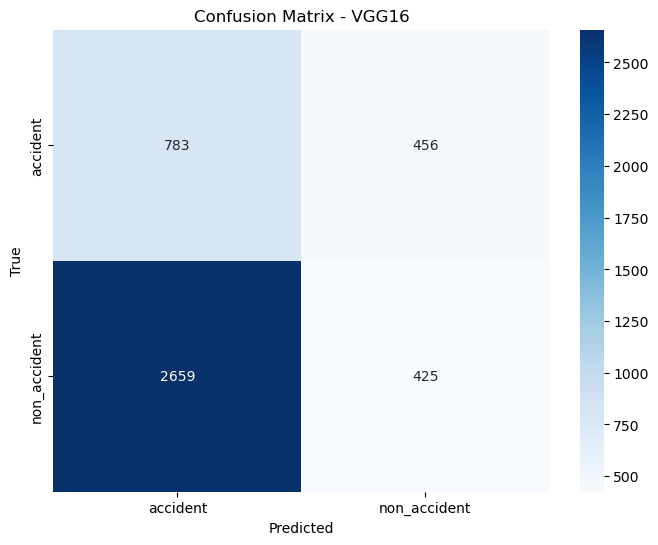

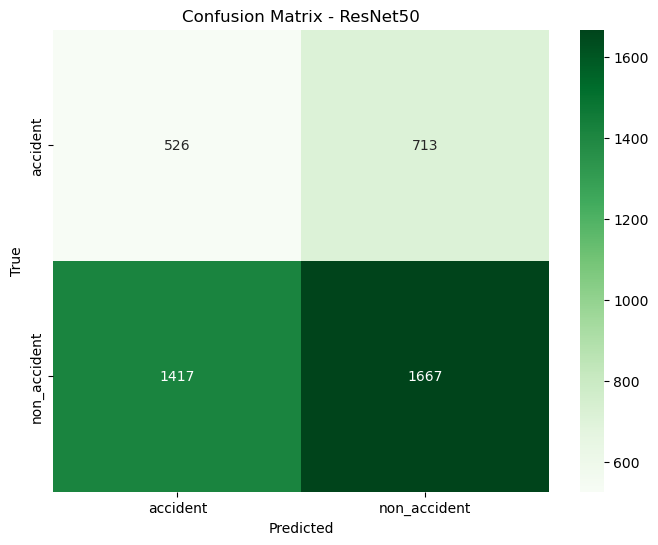


Comparison of VGG16 and ResNet50 Models:
      Model      Loss  Accuracy
0     VGG16  1.865597  0.279436
1  ResNet50  0.925727  0.507287


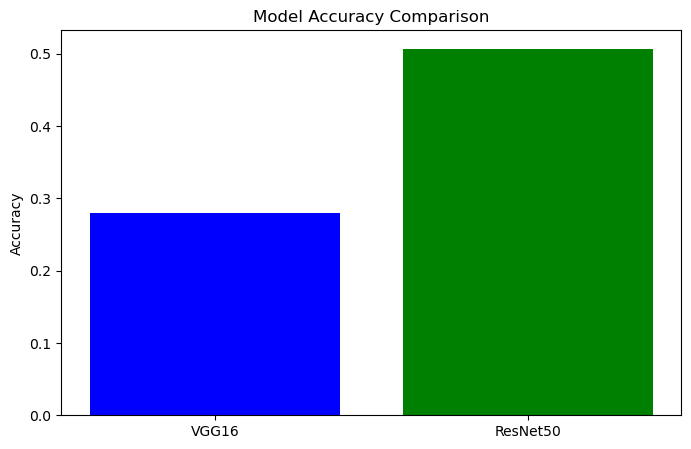

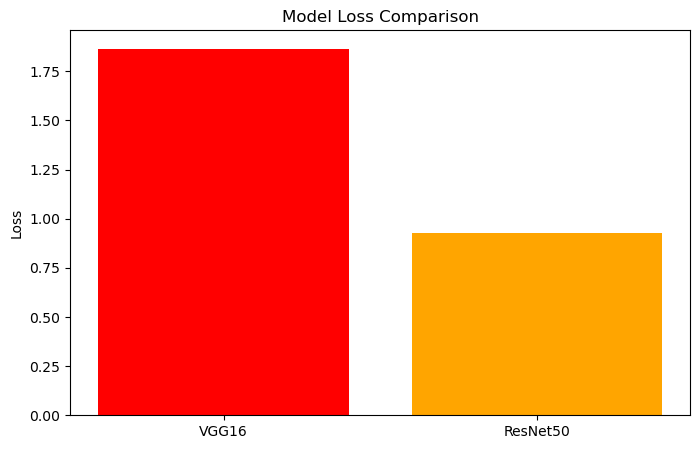

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Paths to the saved models
vgg_model_path = r'D:\OneDrive - FORSAN FOODS & CONSUMER PRODUCTS\AI Sandiego\A501\Module-7\vgg16Model_checkpoint.keras'
resnet_model_path = r'D:\OneDrive - FORSAN FOODS & CONSUMER PRODUCTS\AI Sandiego\A501\Module-7\model_resnet50.keras'

# Path to the test dataset directory
test_data_dir = r'D:\OneDrive - FORSAN FOODS & CONSUMER PRODUCTS\AI Sandiego\A501\Module-7\Test'

# Parameters
image_size = (224, 224)
batch_size = 32

# Load both models
vgg_model = load_model(vgg_model_path)
resnet_model = load_model(resnet_model_path)

# Data generator for test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# True labels and class names
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Evaluate VGG16
print("Evaluating VGG16 Model...")
vgg_loss, vgg_accuracy = vgg_model.evaluate(test_generator)
vgg_predictions = vgg_model.predict(test_generator)
vgg_predicted_classes = (vgg_predictions > 0.5).astype(int)

# Evaluate ResNet50
print("Evaluating ResNet50 Model...")
resnet_loss, resnet_accuracy = resnet_model.evaluate(test_generator)
resnet_predictions = resnet_model.predict(test_generator)
resnet_predicted_classes = (resnet_predictions > 0.5).astype(int)

# Classification Report for VGG16
print("\nClassification Report for VGG16:")
vgg_report = classification_report(true_classes, vgg_predicted_classes, target_names=class_labels)
print(vgg_report)

# Classification Report for ResNet50
print("\nClassification Report for ResNet50:")
resnet_report = classification_report(true_classes, resnet_predicted_classes, target_names=class_labels)
print(resnet_report)

# Confusion Matrices
vgg_conf_matrix = confusion_matrix(true_classes, vgg_predicted_classes)
resnet_conf_matrix = confusion_matrix(true_classes, resnet_predicted_classes)

# Plot Confusion Matrix for VGG16
plt.figure(figsize=(8, 6))
sns.heatmap(vgg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - VGG16')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Confusion Matrix for ResNet50
plt.figure(figsize=(8, 6))
sns.heatmap(resnet_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - ResNet50')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Comparative Analysis
results = {
    'Model': ['VGG16', 'ResNet50'],
    'Loss': [vgg_loss, resnet_loss],
    'Accuracy': [vgg_accuracy, resnet_accuracy]
}

results_df = pd.DataFrame(results)
print("\nComparison of VGG16 and ResNet50 Models:")
print(results_df)

# Plot Comparative Accuracy
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Plot Comparative Loss
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['Loss'], color=['red', 'orange'])
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.show()
